<a href="https://colab.research.google.com/github/cfusterbarcelo/Sirviendo-Te/blob/main/notebooks/Sirviendo_te_es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ☕ Sirviendo-Té: Analiza tu chat de WhatsApp

### Bienvenida, bienvenido, bienvenide. 💬✨

No te asustes: **no vas a tener que programar**.  
Este cuaderno está diseñado para que puedas **sacarle todo el jugo a tu chat de WhatsApp** sin complicaciones.

Solo necesitas:

1. Exportar tu chat desde WhatsApp (encontrarás cómo en el [Readme.md](../README.md)).
2. Subirlo aquí.
3. Sentarte a disfrutar de **gráficos, nubes de palabras, datos curiosos y estadísticas** que revelan lo que pasa realmente en tu grupo.

Vamos a ir viendo cosas como:
- Quién habla más
- Qué palabras se usan más
- Cuándo está más activo el grupo

### Cómo usar el cuaderno

Estos son los famosos "notebooks" de Python. Este cuaderno tiene un montón de código en Python oculta que hace todo por ti. Tu solo tienes que ir dándole al play a las celdas y darle información al programa cuando te lo pide (como el fichero).
Así que, de nuevo, no te preocupes si no sabes programar, solo disfruta.

Vamos a ello!

## 📂 Sube tu archivo exportado de WhatsApp

Arrastra o selecciona el archivo `.txt` que exportaste desde tu chat de WhatsApp.

Assegúrate de descomprimirlo si lo tienes en un `.zip`, aquí necesitamos el `.txt` para sacarle todo el jugo!

⬇️ Sube tu archivo aquí abajo:

In [16]:
# @title 📎 Subir archivo de WhatsApp (.txt) { display-mode: "form" }
from google.colab import files
import pandas as pd
import re
from scripts.utils import cargar_chat, limpiar_mensajes

uploaded = files.upload()
chat_file = list(uploaded.keys())[0]

with open(chat_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()
print("✅ Archivo cargado correctamente. ¡Vamos allá!")

df = cargar_chat(lines)
df = limpiar_mensajes(df)

Saving _chat.txt to _chat.txt
✅ Archivo cargado correctamente. ¡Vamos allá!


In [17]:
# @title 📦 Cargar librerías { display-mode: "form" }
import pandas as pd
import re
import unicodedata
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Mostrar gráficos dentro del notebook
%matplotlib inline

# Clonar el repo e importar funciones
!git clone https://github.com/cfusterbarcelo/Sirviendo-Te.git
%cd Sirviendo-Te


Cloning into 'Sirviendo-Te'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 8.17 KiB | 8.17 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Sirviendo-Te/Sirviendo-Te/Sirviendo-Te


## 🧼 ¿Quieres eliminar alguna palabra concreta de tu chat?

Esta herramienta ya filtra muchas palabras comunes en castellano y catalán, como “que”, “el”, “las”, “y”, “jaja”, etc.  
Pero si hay **otras palabras que quieres quitar porque no aportan nada** (como nombres propios, bromas internas, etc.), puedes escribirlas aquí abajo.

✍️ Escríbelas separadas por comas. Por ejemplo:
```
lucía,pixar,vale,lol,jose
```


In [27]:
# @title ✍️ Escribe palabras adicionales a eliminar (separadas por comas) { display-mode: "form" }
palabras_extra = "viernes,domingo,fatal"  # @param {type:"string"}
palabras_extra = [p.strip().lower() for p in palabras_extra.split(",") if p.strip()]

## ☁️ Nube de palabras

Aquí tienes una nube de palabras basada en tu chat.  
Ya hemos filtrado palabras comunes (como “que”, “el”, “jajaja”, etc.) y también hemos eliminado las que tú añadiste manualmente más arriba.

🔍 Cuanto más grande aparece una palabra, más veces se ha repetido.

*(Este paso puede tardar un poco si tu chat es muy largo.)*

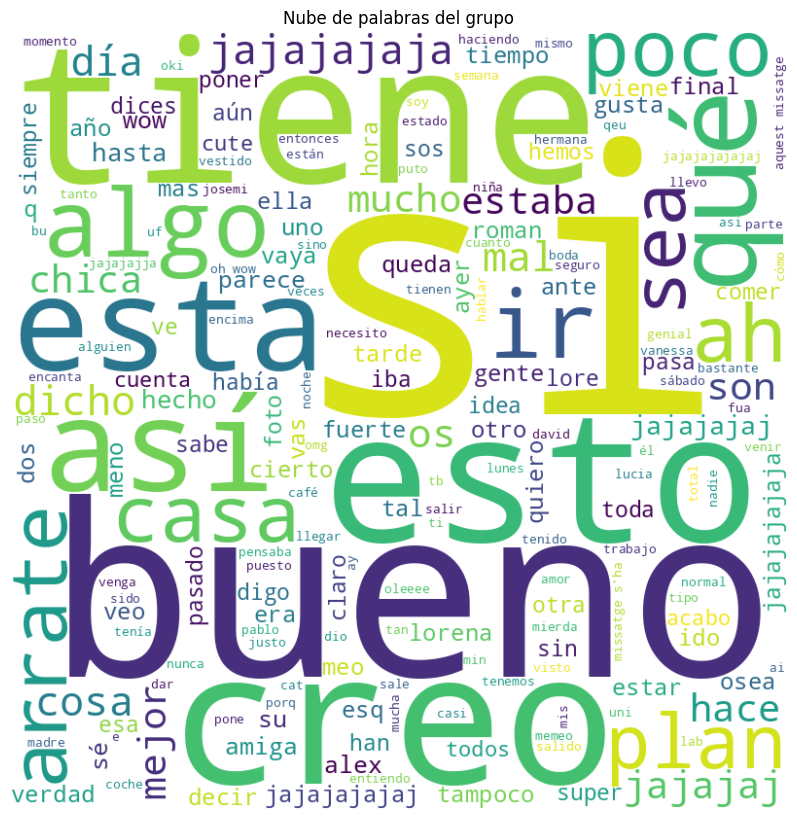

In [19]:
# @title ☁️ Generar nube de palabras { display-mode: "form" }

# TODO: Change in oriringal repo
# from utils_chat import construir_stopwords, generar_wordcloud
from scripts.utils import generar_wordcloud

# Construir stopwords combinadas
stopwords_totales = construir_stopwords(extra=palabras_extra, idioma='es')

# Generar WordCloud directamente
generar_wordcloud(df, stopwords_totales, title='Nube de palabras del grupo')


## 🗣️ ¿Quién habla más en el grupo?

Aquí puedes ver el número de mensajes que ha enviado cada persona en el chat.  
¡Descubre quién es la persona que más té tiene que contar!

*(No se cuentan archivos adjuntos ni mensajes eliminados — solo lo que se ha escrito de verdad.)*

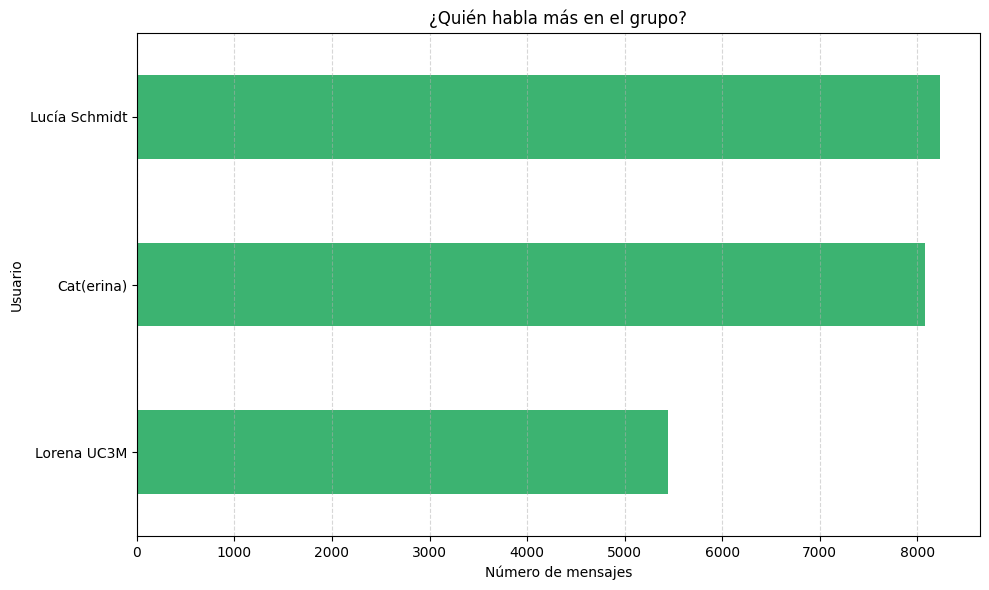

In [23]:
# @title 📊 Ver quién ha enviado más mensajes { display-mode: "form" }
df['Usuario'] = df['Usuario'].apply(lambda x: re.sub(r'[^\w\s@()áéíóúÁÉÍÓÚüÜñÑ]', '', x))

# Filtrar mensajes de sistema que contienen "creado el grupo", "cambió la foto", etc.
mensajes_validos = df[
    ~df['Mensaje'].str.contains("has creado el grupo|cambió la foto del grupo|añadió a", case=False, na=False)
    & ~df['Usuario'].str.contains("chat", case=False)
]

# Contar mensajes por usuario
conteo_mensajes = mensajes_validos['Usuario'].value_counts()

# Mostrar gráfico
plt.figure(figsize=(10, 6))
conteo_mensajes.plot(kind='barh', color='mediumseagreen')
plt.xlabel("Número de mensajes")
plt.title("¿Quién habla más en el grupo?")
plt.gca().invert_yaxis()  # para que el que más habla esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ✍️ ¿Quién se enrolla más?

Aquí puedes ver la **media de palabras por mensaje** de cada persona.  
Las que más escriben por mensaje no siempre son las que más mensajes mandan. ¡Veamos quién es la reina del párrafo largo!

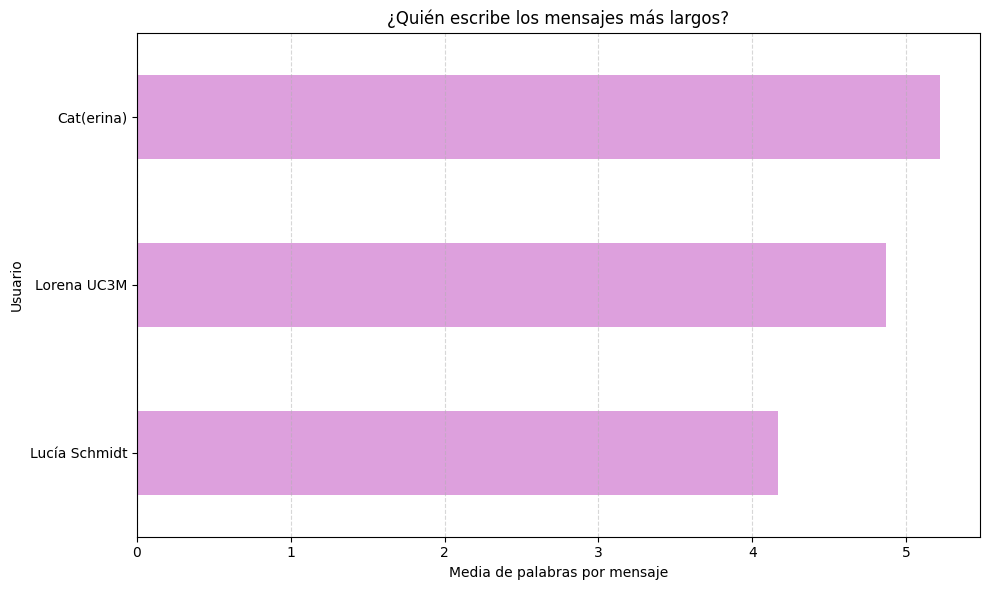

In [26]:
# @title ✍️ Ver quién escribe mensajes más largos (por número de palabras) { display-mode: "form" }

# Quitar emojis y rarezas de nombres de usuario
df['Usuario'] = df['Usuario'].apply(lambda x: re.sub(r'[^\w\s@()áéíóúÁÉÍÓÚüÜñÑ]', '', x))

# Crear nueva versión del DataFrame solo con personas reales
df_usuarios = df[
    ~df['Usuario'].str.lower().str.contains('chat') &
    ~df['Mensaje'].str.lower().str.contains(
        'has creado el grupo|cambió la foto del grupo|ha cambiado el asunto|añadió a|has cambiado el nombre',
        na=False
    )
].copy()

# Crear columna con número de palabras por mensaje
df_usuarios['num_palabras'] = df_usuarios['Mensaje'].str.split().apply(len)

# Eliminar mensajes vacíos o NaN (por si acaso)
df_filtrado = df_usuarios[df_usuarios['num_palabras'] > 0]

# Calcular media por persona
media_palabras = df_filtrado.groupby('Usuario')['num_palabras'].mean().sort_values(ascending=False)

# Mostrar gráfico
plt.figure(figsize=(10, 6))
media_palabras.plot(kind='barh', color='plum')
plt.xlabel("Media de palabras por mensaje")
plt.title("¿Quién escribe los mensajes más largos?")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 🫖 El verdadero té: ¿quién aparece más?

A veces no se trata de quién habla más, sino de **quién es más mencionado**.  
En esta sección puedes introducir nombres u otras palabras clave y ver **cuántas veces se mencionan en el chat**. Puedes añadir tantas como quieras! Si quieres añadir nuevas, solo vuelve a darle al play a esta las siguientes celdas!

Nadie más conoce a este chat como tú, así que es tu momento de buscar cuáles son vuestros temas de conversación más "juicy".
Por ejemplo:
- Nombres de personas externas al grupo
- Palabras o expresiones recurrentes
- El nombre de tu tu compañero de piso 👀

✍️ Escribe las palabras separadas por comas.


In [28]:
# @title ☕ Palabras clave para medir { display-mode: "form" }
palabras_clave = "juan,pablo,drama,vintage"  # @param {type:"string"}
palabras_clave = [p.strip().lower() for p in palabras_clave.split(",") if p.strip()]


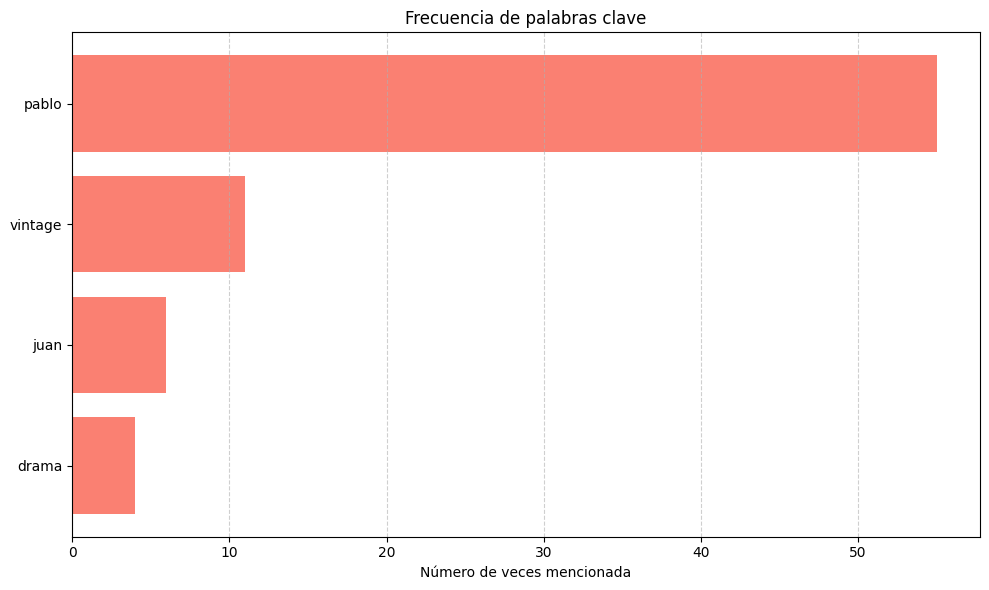

In [30]:
# @title 📊 Frecuencia de palabras clave { display-mode: "form" }

from scripts.utils import normalizar

# Unir todo el texto del chat
texto_chat = ' '.join(df_usuarios['Mensaje'].astype(str))
texto_chat = normalizar(texto_chat)

# Dividir en palabras limpias
palabras_en_chat = re.findall(r'\b[a-z]+\b', texto_chat)

# Contar solo las que están en palabras_clave
contador = Counter([p for p in palabras_en_chat if p in palabras_clave])

# Crear DataFrame para graficar
df_freq = pd.DataFrame(contador.items(), columns=['Palabra', 'Frecuencia']).sort_values(by='Frecuencia', ascending=True)

# Mostrar gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_freq['Palabra'], df_freq['Frecuencia'], color='salmon')
plt.xlabel("Número de veces mencionada")
plt.title("Frecuencia de palabras clave")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Meter en utils.py:

In [9]:
def construir_stopwords(extra=None, idioma='es'):
    """
    Construye un conjunto de stopwords combinando:
    - STOPWORDS por defecto de WordCloud
    - Palabras comunes adicionales por idioma
    - Lista personalizada de palabras (opcional)
    """

    # Stopwords personalizadas por idioma
    stopwords_es = {
        'que', 'de', 'y', 'el', 'la', 'lo', 'los', 'las', 'en', 'es', 'un', 'una', 'por', 'con',
        'yo', 'tú', 'tu', 'te', 'me', 'mi', 'ya', 'sí', 'no', 'al', 'se', 'les', 'le', 'del',
        'este', 'ese', 'eso', 'aquí', 'allí', 'ahí', 'porque', 'pues', 'más', 'muy', 'para',
        'voy', 'estoy', 'está', 'estás', 'estamos', 'he', 'ha', 'has', 'hay', 'hacer', 'ser',
        'va', 'vamos', 'todo', 'nada', 'también', 'igual', 'pero', 'solo', 'bien', 'como', 'cuando',
        'donde', 'ni', 'sí', 'o', 'u', 'vale', 'https', 'tengo', 'tener', 'hoy', 'mañana', 'ahora',
        'luego', 'sisi', 'oye', 'ver', 'dice', 'dijo', 'da', 'nos', 'nosotros',
        'solo', 'puede', 'puedo', 'puedes', 'quiere', 'quieren', 'aunque', 'eso', 'buenas',
        'jajajaja', 'jajaja', 'jaja', 'ajaja', 'xd', 'lol', 'bua', 'uff', 'aja',
        'sii', 'siii', 'siiii', 'ok', 'ajajaja', 'ajajaj', 'jssjs', 'jjaja', 'ajja',
        'gracias', 'vida', 'mmm', 'wtf', 'tía', 'tia', 'ufff', 'eh', 'ajá'
    }

    stopwords_ca = {
        'que', 'de', 'i', 'el', 'la', 'les', 'els', 'en', 'un', 'una', 'per', 'amb',
        'jo', 'tu', 'te', 'em', 'ja', 'sí', 'no', 'al', 'es', 'del', 'més', 'molt',
        'quan', 'com', 'perquè', 'doncs', 'bé', 'també', 'res', 'tot', 'cap', 'fins',
        'algun', 'alguna', 'allò', 'això', 'aquí', 'allà', 'ara', 'després',
        'tenir', 'està', 'estic', 'estem', 'ha', 'he', 'han', 'hi', 'ser', 'pot',
        'només', 'fer', 'tampoc', 'val', 'https', 'gràcies', 'jajaja', 'jaja', 'jeje',
        'xd', 'lol', 'siii', 'sisplau', 'pixar', 'buah', 'ai', 'eh', 'uau'
    }

    # Elegir set base según idioma
    base = stopwords_es if idioma == 'es' else stopwords_ca

    # Unir con las de WordCloud y las extra
    total = STOPWORDS.union(base)

    if extra:
        total = total.union(set(extra))

    return total